## Lab 03 Part 01: Complete/replicate the lab 3 part 1 example, ensuring you can complete each section. Conduct the target group analysis on a different target group.


### Task: Import and Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import*
from tensorflow import keras

# sklearn encoding, data preparation and evaluation tools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Keras (2.X on - I used 2.7 but the below should work for any version.)
from tensorflow import keras
from tensorflow.keras.layers import Dense, SpatialDropout3D
from tensorflow.keras.models import Sequential

# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator


seed = 1
# fix random seed for reproducibility
np.random.seed(seed)

# Some matplotlib figure sizes
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Opening the file from github
data_o = pd.read_csv("adult.csv")
data_o.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Task: Data Pre-processing

In [3]:
data_o.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
# Used to label encode categorical values
labelencoder = LabelEncoder()

print("\n\n Missing values (?)")
print((data_o == '?').sum())

# Converting missing data to NaN
data_o.replace('?', np.nan, inplace=True)

# here we are dropping the NaN values, this is not ideal, and you will be asked questions on this later
data_o.dropna(inplace=True)

print("\n\n Missing values (?) after del")
print((data_o == '?').sum())

data = data_o.copy()
# This code identifies columns that need label encoding, and are then formatted if they do
print("\n\nColumn Names & formatting:\n")
for col in data_o.columns.values.tolist():
    if data_o[col].dtype == "object" or data_o[col].dtype == "bool":
        print("{:<30}".format(col), ":", "{:<30}".format(str(data[col].dtype)) , "Formatting to LabelEncoding")
        data[col] = labelencoder.fit_transform(data[col])
    else:
        print("{:<30}".format(col), ":", "{:<30}".format(str(data[col].dtype)) , "No formatting required.")


# Convert to array
array = data.values


# get seperated input and classifies, using a deep copy of a list, this is for ML models
X = array[:,0:14]
Y = array[:,14]

data.head(10)



 Missing values (?)
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


 Missing values (?) after del
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


Column Names & formatting:

age                            : int64                          No formatting required.
workclass                      : object                         Formatting to LabelEncoding
fnlwgt                         : int64                          N

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0
7,74,5,88638,10,16,4,9,2,4,0,0,3683,20,38,1
8,68,0,422013,11,9,0,9,1,4,0,0,3683,40,38,0
10,45,2,172274,10,16,0,9,4,2,0,0,3004,35,38,1
11,38,4,164526,14,15,4,9,1,4,1,0,2824,45,38,1
12,52,2,129177,9,13,6,7,1,4,0,0,2824,20,38,1


In [5]:
data.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.199324,1.897938e+05,10.333764,10.121312,2.580134,5.959850,1.418341,3.678602,0.675685,1092.007858,88.372489,40.931238,36.382567,0.248922
std,13.134665,0.953925,1.056530e+05,3.812292,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,7406.346497,404.298370,11.979984,6.105372,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


### Task: Data Preparation

In [6]:
# We are using stratification here, this startifies based on class values. 
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.33, random_state=seed, shuffle = True, stratify=(Y))


# Examine the class breakdown per dataset:
print("Training dataset length:", len(X_train))
print("Testing dataset length:", len(X_test))

class1TrainingPer = np.count_nonzero(Y_train == 1) / len(X_train)
class1TestPer = np.count_nonzero(Y_test == 1) / len(X_test)

print("\nPercentage of 1's in Training data: ", round(class1TrainingPer*100,2), "%")
print("Percentage of 1's in Test data    : ", round(class1TestPer*100,2), "%")

Training dataset length: 20208
Testing dataset length: 9954

Percentage of 1's in Training data:  24.89 %
Percentage of 1's in Test data    :  24.89 %


### Task: Algorithm Development

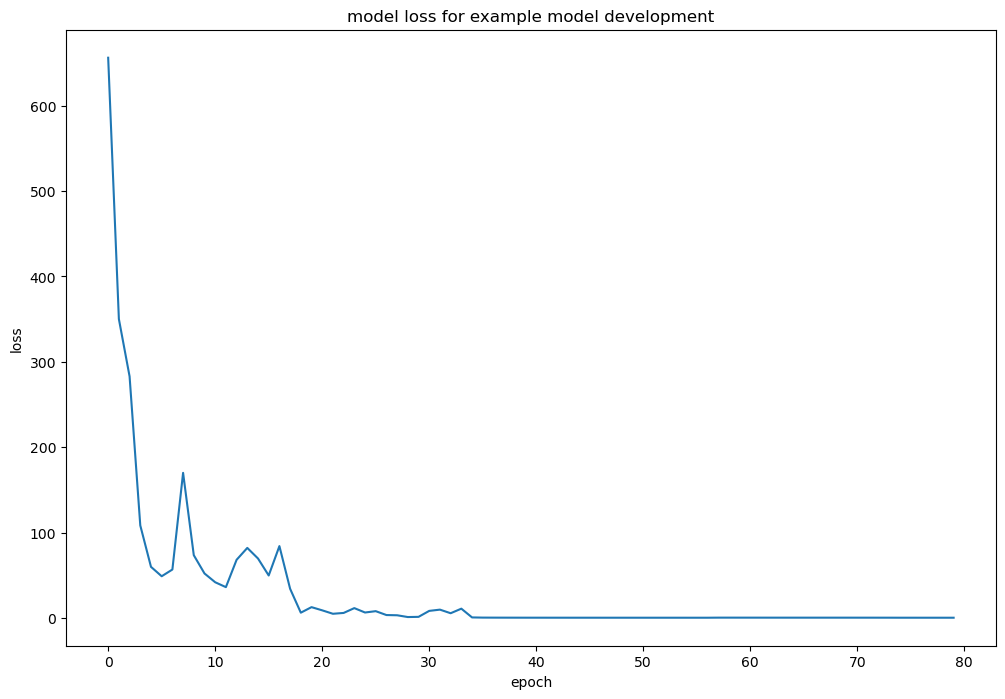

9954/9954 [==============================] - 3s 274us/sample - loss: 0.4959 - acc: 0.7970
Acuracy:  0.796966
Predicted     0    1   All
Actual                    
0          7291  185  7476
1          1836  642  2478
All        9127  827  9954


In [7]:
# Need to rerun seed for each DL cell
tf.random.set_seed(seed)

# Building the neural network
modeldl = Sequential()
# First layer has 14 features as input and has 1000 perceptrons, it is using ReLu (do not change this) as an activation function
modeldl.add(Dense(1000, input_dim=14, activation='relu'))

# The following three layers have 100,100 and 50 perceptrons, they are also using ReLu (do not change this) as an activation function
# if you are tunning the network, you can modifiy the layers here, add remove of change the number of perceptrons.
modeldl.add(Dense(100, activation='relu'))
modeldl.add(Dense(100, activation='relu'))
modeldl.add(Dense(50, activation='relu'))

# The output layer has one neuron and sigmoid is the output activation function - do not change these. 
modeldl.add(Dense(1, activation='sigmoid'))

# Compile model - do not change the loss function of metrics, you can change the optimiser if you wish!
modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
# Feel free here to modify the batch size and epochs!
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=1000, verbose=0)


# Do not modify the below, it is just the matplotlib loss over epoch and confusion matrix 
plt.plot(results.history['loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

print("Acuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
# dl_y_pred = modeldl.predict(X_test)
# dl_y_pred = np.argmax(dl_y_pred,axis=1)
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()


# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

### Task: Target Group Bias

In [8]:
# definition to provide the metrics
def subMetrics(targetGroup, act, pred):
  print("Metrics for: ", targetGroup)
  correct = 0
  # parse both lists to numpy arrays
  act = np.array(act)
  pred = np.array(pred)
  # There may be an easier way to do this, however, I believe it is a manual process!
  for index, item in enumerate(act):  
    if item == pred[index]:
      correct += 1
  # print accuracy, and the confusion matrix
  accuracy = round((correct / len(act)) * 100,2) 
  print("Accuracy:", accuracy, "%")
  print(pd.crosstab( np.array(act),  np.array(pred), rownames=['Actual'], colnames=['Predicted'], margins=True))

In [9]:
# Example for sex target groups  
female_pred = []      # Female was label encoded as 0
female_actual_class = []

male_pred = []        # Male was label encoded as 1
male_actual_class = []


# Populate the confusion matrix grouping by gender (col index 9) you could also do this via group by but would need to convert back to pandas dataframe.
# When grouping by multi class, you will have to modify the below code to include multi class, as for this example there is only two. 
# Also we are using the DT algorithm here, you can change this to DL if you selected that algorithm. 
for index,row in enumerate(X_test):
    if row[9] == 0:       # Female
        female_pred.append(dl_y_pred[index])
        female_actual_class.append(Y_test[index])
    elif row[9] == 1:     # Male
        male_pred.append(dl_y_pred[index])
        male_actual_class.append(Y_test[index])

# Print the representation of each target group       
print("Female instances in the test set:", len(female_pred))        
print("Male instances in the test set:  ", len(male_pred)) 


print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
subMetrics("Female", female_actual_class, female_pred)
print("\n")
subMetrics("Male", male_actual_class, male_pred)

Female instances in the test set: 3244
Male instances in the test set:   6710



Metrics for:  Female
Accuracy: 89.86 %
Predicted     0    1   All
Actual                    
0          2810   55  2865
1           274  105   379
All        3084  160  3244


Metrics for:  Male
Accuracy: 74.78 %
Predicted     0    1   All
Actual                    
0          4481  130  4611
1          1562  537  2099
All        6043  667  6710


### Task: Target Group Bias - Own Preferences

In [10]:
print(data['race'].value_counts())
print(data_o['race'].value_counts())

4    25933
2     2817
1      895
0      286
3      231
Name: race, dtype: int64
White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64


In [11]:
# Example for sex target groups  
white_pred = []      
white_actual_class = []
black_pred = []       
black_actual_class = []
asian_pred = []       
asian_actual_class = []
indian_pred = []       
indian_actual_class = []
other_pred = []       
other_actual_class = []

# Populate the confusion matrix grouping by gender (col index 9) you could also do this via group by but would need to convert back to pandas dataframe.
# When grouping by multi class, you will have to modify the below code to include multi class, as for this example there is only two. 
# Also we are using the DT algorithm here, you can change this to DL if you selected that algorithm. 
for index,row in enumerate(X_test):
    if row[8] == 4:       # Female
        white_pred.append(dl_y_pred[index])
        white_actual_class.append(Y_test[index])
    elif row[8] == 2:     # Male
        black_pred.append(dl_y_pred[index])
        black_actual_class.append(Y_test[index])
    elif row[8] == 1:     # Male
        asian_pred.append(dl_y_pred[index])
        asian_actual_class.append(Y_test[index])
    elif row[8] == 0:     # Male
        indian_pred.append(dl_y_pred[index])
        indian_actual_class.append(Y_test[index])
    elif row[8] == 3:     # Male
        other_pred.append(dl_y_pred[index])
        other_actual_class.append(Y_test[index])

# Print the representation of each target group       
print("White instances in the test set:", len(white_pred))        
print("Black instances in the test set:  ", len(black_pred)) 
print("Asian instances in the test set:", len(asian_pred))        
print("Indian instances in the test set:  ", len(indian_pred)) 
print("Other instances in the test set:", len(other_pred))  


print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
subMetrics("White", white_actual_class, white_pred)
print("\n")
subMetrics("Black", black_actual_class, black_pred)
print("\n")
subMetrics("Asian", asian_actual_class, asian_pred)
print("\n")
subMetrics("Indian", indian_actual_class, indian_pred)
print("\n")
subMetrics("Other", other_actual_class, other_pred)

White instances in the test set: 8604
Black instances in the test set:   885
Asian instances in the test set: 302
Indian instances in the test set:   88
Other instances in the test set: 75



Metrics for:  White
Accuracy: 78.57 %
Predicted     0    1   All
Actual                    
0          6178  170  6348
1          1674  582  2256
All        7852  752  8604


Metrics for:  Black
Accuracy: 90.06 %
Predicted    0   1  All
Actual                 
0          767   7  774
1           81  30  111
All        848  37  885


Metrics for:  Asian
Accuracy: 76.16 %
Predicted    0   1  All
Actual                 
0          206   4  210
1           68  24   92
All        274  28  302


Metrics for:  Indian
Accuracy: 89.77 %
Predicted   0  1  All
Actual               
0          75  2   77
1           7  4   11
All        82  6   88


Metrics for:  Other
Accuracy: 89.33 %
Predicted   0  1  All
Actual               
0          65  2   67
1           6  2    8
All        71  4   75
